<a href="https://colab.research.google.com/github/VitorRodgs/RNA/blob/main/Rna.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model: "rede"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_32 (Dense)            (None, 60)                120       
                                                                 
 dense_33 (Dense)            (None, 120)               7320      
                                                                 
 dense_34 (Dense)            (None, 120)               14520     
                                                                 
 dense_35 (Dense)            (None, 1)                 121       
                                                                 
Total params: 22,081
Trainable params: 22,081
Non-trainable params: 0
_________________________________________________________________
None


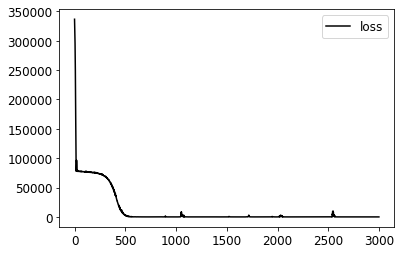

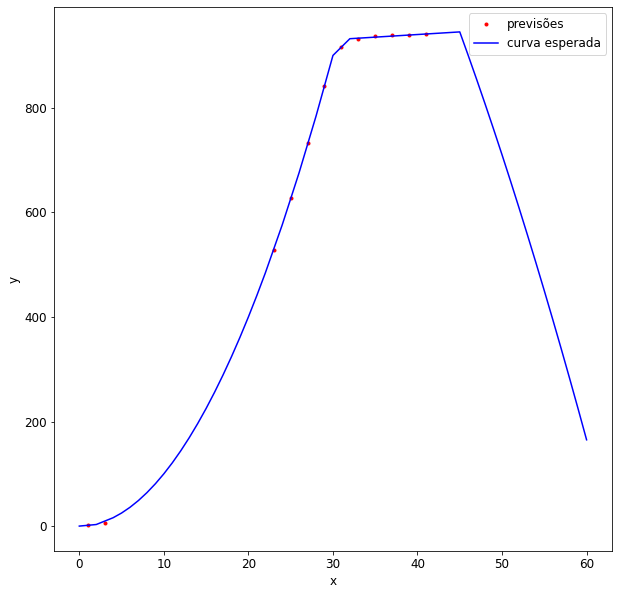

In [51]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

r_d = 49
r_t = 12

x_train = np.array([0.0, 2.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 24.0, 26.0, 28.0, 30.0, 32.0, 34.0, 36.0, 38.0, 40.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0], dtype=float)
y_train = np.array([0.0, 3.0, 16.0, 25.0, 36.0, 49.0, 64.0, 81.0, 100.0, 121.0, 144.0, 169.0, 196.0, 225.0, 256.0, 289.0, 324.0, 361.0, 400.0, 441.0, 484.0, 576.0, 676.0, 784.0, 900.0, 932.0, 934.0, 936.0, 938.0, 940.0, 942.0, 943.0, 944.0, 945.0, 900.0, 854.0, 807.0, 759.0, 710.0, 660.0, 609.0, 557.0, 504.0, 450.0, 395.0, 339.0, 282.0, 224.0, 165.0], dtype=float)

x_test = np.array([1.0, 3.0, 23.0, 25.0, 27.0, 29.0, 31.0, 33.0, 35.0, 37.0, 39.0, 41.0], dtype=float)
y_test = np.array([1.0, 9.0, 529.0, 625.0, 729.0, 841.0, 931.0, 933.0, 935.0, 937.0, 939.0, 941.0], dtype=float)

model = tf.keras.Sequential(name='rede')
model.add(tf.keras.layers.Dense(60,input_dim=1, activation='relu'))
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dense(120, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='linear'))

opt=tf.keras.optimizers.Adam(learning_rate=0.002)
model.compile(optimizer=opt, loss='mean_squared_error')
print(model.summary())
history = model.fit(x_train, y_train, epochs = 3000, verbose=0)

plt.rcParams.update({'font.size':12})
plt.figure()
plt.plot(history.history['loss'],'k')
plt.legend(['loss'])

y_pred=model.predict(x_test)

plt.figure(figsize=(10, 10))
plt.plot(x_test, y_pred, 'r.')
plt.plot(x_train, y_train, 'b-')
plt.legend(['previsões', 'curva esperada'])
plt.xlabel('x');plt.ylabel('y')

import h5py
#salva a rede
model.save("rede_neural.h5")

18
[[323.24414]]


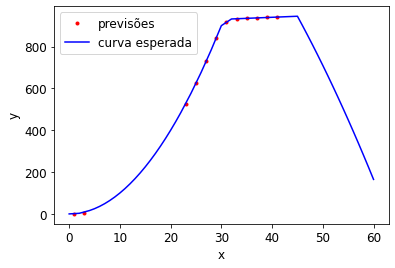

In [58]:
import h5py
model = tf.keras.models.load_model("rede_neural.h5")
y_pred=model.predict(x_test)
plt.figure()
plt.plot(x_test,y_pred,'r.')
plt.plot(x_train,y_train,'b-')
plt.legend(['previsões','curva esperada'])
plt.xlabel('x');plt.ylabel('y')
x = float(input())
  
if x > 60 or x < 0:
  print("Valor não está no intervalo de valores de entrada!")
else:
   print(model.predict([x]))
